# Generate O2 absorption profiles for different observatory sites
===================================================================================

- Sylvie Dagoret-Campagne
- affliliation : IJCLAB/IN2P3/CNRS
- creation date :  23 October 2023
- Last verification : October 23th 2023

===================================================================================

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import os
import numpy as np

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import seaborn as sns

In [4]:
matplotlib.rcParams.update({'font.size': 15, 'lines.linewidth': 2, 'lines.markersize': 15})
matplotlib.rcParams["axes.labelsize"]="small"
matplotlib.rcParams["axes.linewidth"]=2.0
matplotlib.rcParams["xtick.major.size"]=8
matplotlib.rcParams["ytick.major.size"]=8
matplotlib.rcParams["ytick.minor.size"]=5
matplotlib.rcParams["xtick.labelsize"]="large"
matplotlib.rcParams["ytick.labelsize"]="large"
matplotlib.rcParams["figure.figsize"]=(12,6)
matplotlib.rcParams['axes.titlesize'] = 15
matplotlib.rcParams['axes.titleweight'] = 'bold'
#matplotlib.rcParams['axes.facecolor'] = 'blue'
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'
matplotlib.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
matplotlib.rcParams['lines.markersize'] = 10  # markersize, in points
matplotlib.rcParams['grid.alpha'] = 1. # transparency, between 0.0 and 1.0
matplotlib.rcParams['grid.linestyle'] = '-' # simple line
matplotlib.rcParams['grid.linewidth'] = 0.4 # in points 

In [5]:
os.getenv('LIBRADTRANDIR')

'/Users/dagoret/MacOSX/External/libRadtran'

In [6]:
from libradtranpy import libsimulateVisible

libradtranpath= /Users/dagoret/MacOSX/External/libRadtran/


In [7]:
from libradtranpy.libsimulateVisible import Dict_Of_sitesPressures 

In [8]:
List_Of_All_sites = list(Dict_Of_sitesPressures.keys()) 
List_Of_All_sites 

['LSST', 'CTIO', 'OHP', 'PDM', 'OMK', 'OSL']

In [9]:
NSites = len(List_Of_All_sites)

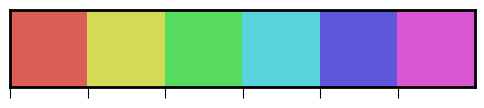

In [10]:
hls_colors = sns.color_palette("hls", NSites)
sns.palplot(hls_colors)

In [11]:
import sys
sys.path

['/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/libradtranpy/docs/notebooks/libradtranpy',
 '/Users/dagoret/anaconda3/envs/conda_py310/lib/python310.zip',
 '/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10',
 '/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10/lib-dynload',
 '',
 '/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10/site-packages',
 '/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/AtmEmulator/src',
 '/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/FitDiffAtmo/src',
 '/Users/dagoret/MacOSX/GitHub/LSST/AtmosphericSimulation/libradtranpy/src',
 '/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10/site-packages/getObsAtmo-0.1.0-py3.10.egg']

## Choose the parameters of the simulation

In [12]:
am= 1
pressure = 0. # use default value
pwv=0       # turn on or of the pwv
aer=0  
ozone=0.    # turn on or of the ozone
cloudext=0

## Simulation

In [13]:
all_trans = []
all_obs = []
for index, site in enumerate(List_Of_All_sites):
    all_obs.append(site)
    path,thefile=libsimulateVisible.ProcessSimulation(am,pwv,ozone,pressure,
                                                      prof_str='us',proc_str='ab',cloudext=cloudext,altitude_str=site)
    data = np.loadtxt(os.path.join(path,thefile))
    wl = data[:,0]
    atm = data[:,1] 
    all_trans.append(atm)

## Plot

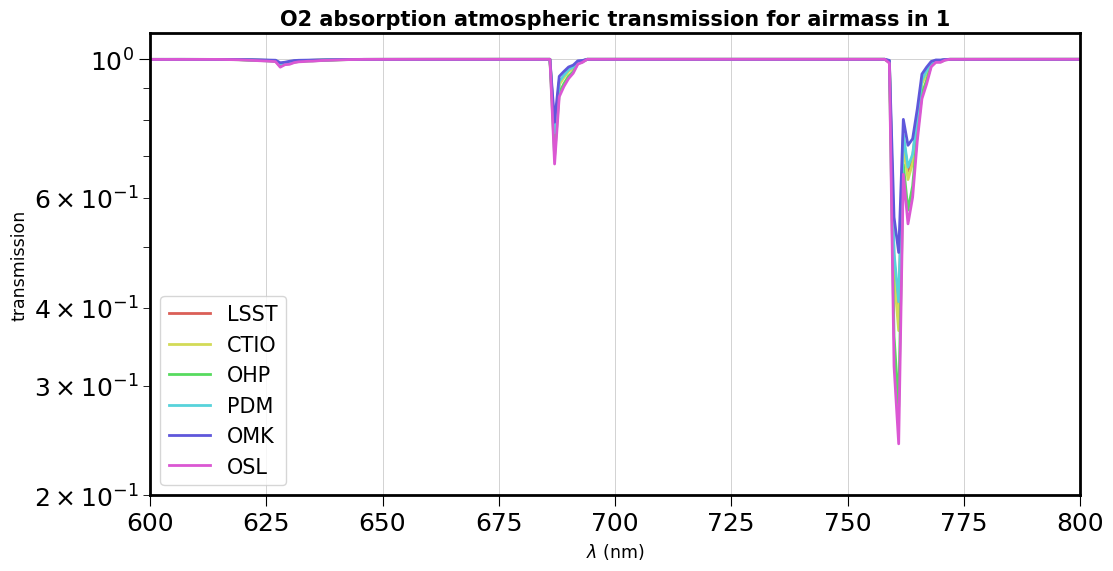

In [14]:
for index in np.arange(NSites):   
    plt.semilogy(wl,all_trans[index],'-',color=hls_colors[index],label=all_obs[index])
plt.xlim(600,800)
plt.grid()
plt.title(f"O2 absorption atmospheric transmission for airmass in {am}")
plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.2,1.1)
plt.legend()
figname="multisitesO2transmissionvssite_log.png"
plt.savefig(figname)

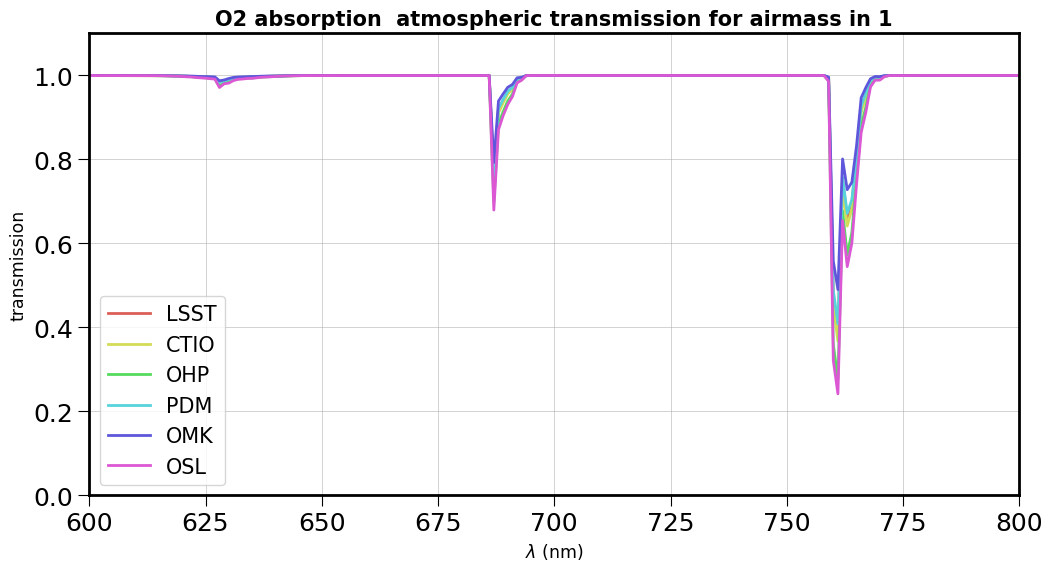

In [15]:
for index in np.arange(NSites):   
    plt.plot(wl,all_trans[index],'-',color=hls_colors[index],label=all_obs[index])
plt.xlim(600,800)
plt.grid()
plt.title(f"O2 absorption  atmospheric transmission for airmass in {am}")

plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.,1.1)
plt.legend()
figname="multisitesO2transmission_vssitelin.png"
plt.savefig(figname)

## Compare libradtran with standard pressure and libradtran with P=743

In [16]:
path,thefile=libsimulateVisible.ProcessSimulation(am,pwv,ozone,pressure,
                                                      prof_str='us',proc_str='ab',cloudext=cloudext,altitude_str='LSST')
data = np.loadtxt(os.path.join(path,thefile))
wl1 = data[:,0]
atm1 = data[:,1]
Pstand = Dict_Of_sitesPressures['LSST']
label1 = f"LSST site with P = {Pstand:.2f} hPa"


Ptest = 743.0
path,thefile=libsimulateVisible.ProcessSimulation(am,pwv,ozone,Ptest,
                                                      prof_str='us',proc_str='ab',cloudext=cloudext,altitude_str='LSST')
data = np.loadtxt(os.path.join(path,thefile))
wl2 = data[:,0]
atm2 = data[:,1]
label2 = f"LSST site with P = {Ptest:.2f} hPa"



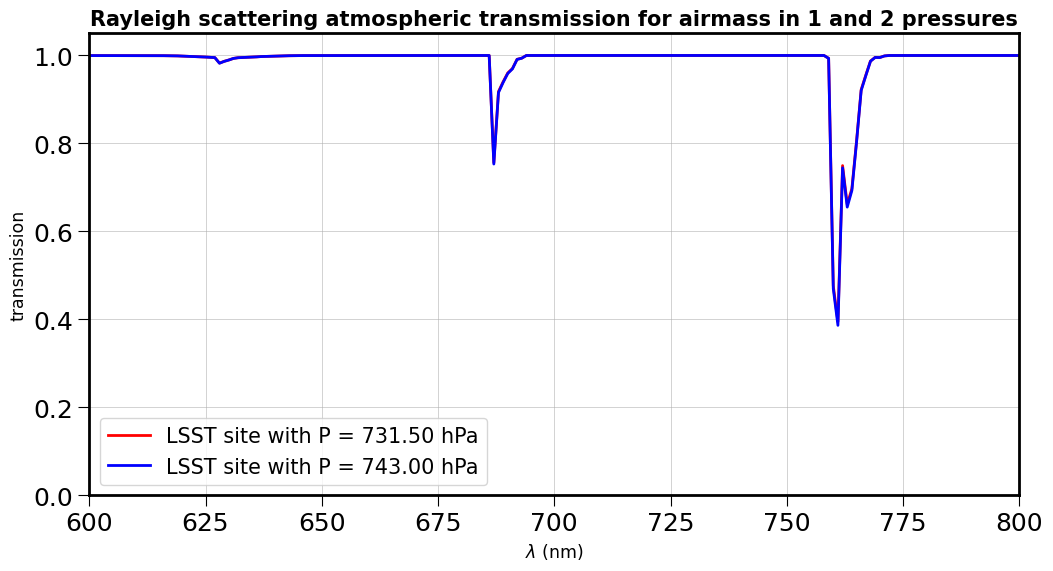

In [17]:

plt.plot(wl1,atm1,'-r',label=label1)
plt.plot(wl2,atm2,'-b',label=label2)
plt.xlim(600,800)
plt.grid()
plt.title(f"Rayleigh scattering atmospheric transmission for airmass in {am} and 2 pressures")

plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.,1.05)
plt.legend()
figname="comparepressuresO2transmission_lsst_lin.png"
plt.savefig(figname)

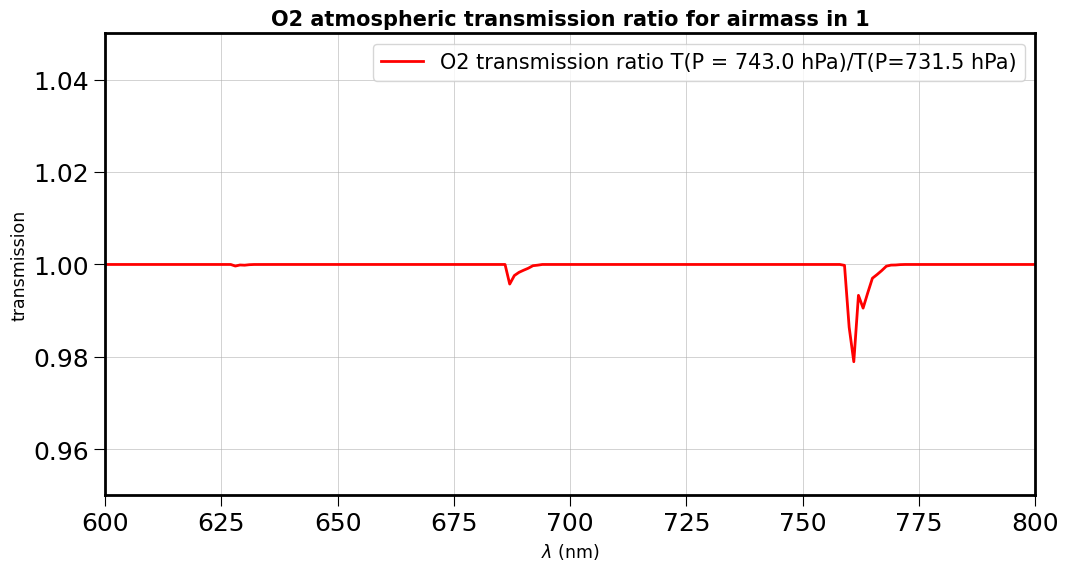

In [18]:
the_leg = f"O2 transmission ratio T(P = {Ptest:.1f} hPa)/T(P={Pstand:.1f} hPa)"
plt.plot(wl1,atm2/atm1,'-r',label=the_leg)

plt.xlim(600,800)

plt.grid()
plt.title(f"O2 atmospheric transmission ratio for airmass in {am}")

plt.xlabel("$\\lambda$ (nm)")
plt.ylabel("transmission")
plt.ylim(0.95,1.05)
plt.legend()
figname="comparepressuresO2transmissionratio_lsst_lin.png"
plt.savefig(figname)